## STEM-2019

# Современная криптография: от электронных подписей до блокчейна

### Садртдинов Ильдус

![](images/logo.png)

### <center> Факультет Компьютерных Наук НИУ ВШЭ & SmartDec </center>

In [5]:
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from time import time
import hashlib

sns.set_style('whitegrid')
plt.rcParams.update({'font.size': 14})

### 1. Частотный анализ

**Частотный анализ** позволяет расшифровывать сообщения или тексты, опираясь на **частоту** появления тех или иных лексических единиц. Мы рассмотрим самый простой случай - воспользуемся **перестановочным шифром** на буквах русского алфавита и, опираясь на то, как часто в русских словах используются буквы, расшифруем текст. В качестве синтетического примера лучше взять достаточно большой текст, в нашем случае - **"Война и мир", I том**.

Посчитаем частоты букв и сравним с приведенными в Википедии.

In [6]:
alphabet = set('абвгдеёжзийклмнопрстуфхцчшщъыьэюя')
frequency = dict.fromkeys(alphabet, 0)

with open('Война и Мир.txt') as file:
    for char in tqdm(file.read().lower()):
        if char in alphabet:
            frequency[char] += 1

total = sum(frequency.values())
for char in alphabet:
    frequency[char] *= 100 / total

frequency = dict(sorted(frequency.items(), key=lambda x: -x[1]))

In [7]:
wikipedia_frequency = {
    'о': 10.97,
    'е': 8.45,
    'а': 8.01,
    'и': 7.35,
    'н': 6.70,
    'т': 6.26,
    'с': 5.47,
    'р': 4.73,
    'в': 4.54,
    'л': 4.40,
    'к': 3.49,
    'м': 3.21,
    'д': 2.98,
    'п': 2.81,
    'у': 2.62,
    'я': 2.01,
    'ы': 1.90,
    'ь': 1.74,
    'г': 1.70,
    'з': 1.65,
    'б': 1.59,
    'ч': 1.44,
    'й': 1.21,
    'х': 0.97,
    'ж': 0.94,
    'ш': 0.73,
    'ю': 0.64,
    'ц': 0.48,
    'щ': 0.36,
    'э': 0.32,
    'ф': 0.26,
    'ъ': 0.04,
    'ё': 0.04
}

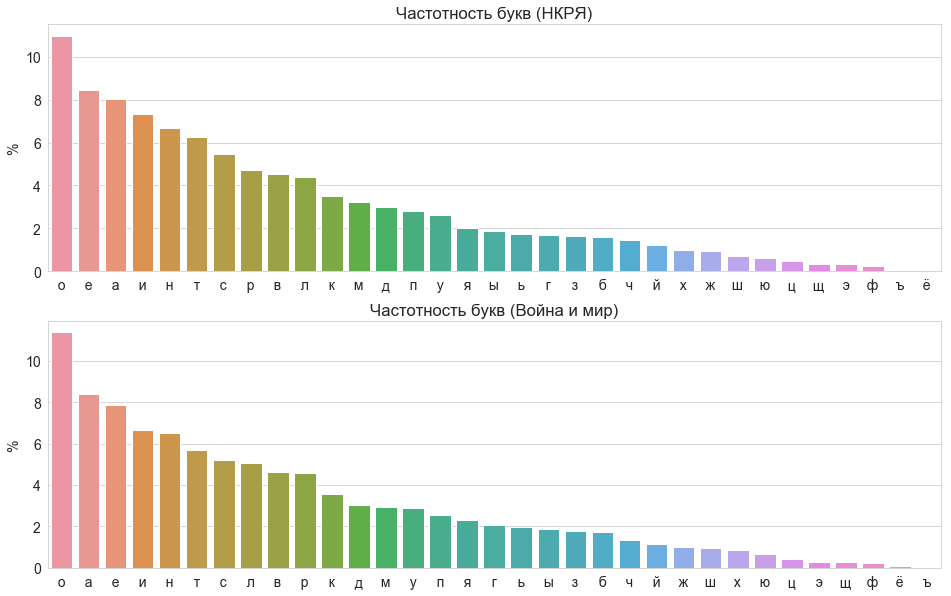

In [8]:
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(16, 10))

labels = ['  ' + char + '  ' for char in wikipedia_frequency.keys()]
table = pd.DataFrame(data=zip(labels, wikipedia_frequency.values()), columns=['letter', 'frequency'])
sns.barplot(data=table, x='letter', y='frequency', ax=axs[0])
axs[0].set_title('Частотность букв (НКРЯ)')
axs[0].set_xlabel('')
axs[0].set_ylabel('%')

labels = ['  ' + char + '  ' for char in frequency.keys()]
table = pd.DataFrame(data=zip(labels, frequency.values()), columns=['letter', 'frequency'])
sns.barplot(data=table, x='letter', y='frequency', ax=axs[1])
axs[1].set_title('Частотность букв (Война и мир)')
axs[1].set_xlabel('')
axs[1].set_ylabel('%')

plt.show()

Теперь сгенерируем шифр: возьмем случайную перестановку букв русского алфавита, после чего зашифруем текст.

In [9]:
cipher = dict(zip(alphabet, np.random.permutation(list(alphabet))))

In [10]:
with open('Война и Мир.txt') as file:
    encrypted = ''
    for char in tqdm(file.read().lower()):
        encrypted += cipher[char] if char in alphabet else char

In [11]:
encrypted[80000:81000]

'ф шбш mon cher ур щукуьшб кюфд чфа шюоблифршт, чфа дцбфвжшн уххфроук оцо кежф, хцо ш ршъф фщу юхуткжшд блытд) ац юфчт ш ац ыуьущшн шдфршрршэ. юдухьшхф ъф, гьшфаъцвхф учфыцхй. ке дфрт учшышхф, mon cher. ыёжфкру гьужё кцю ух кюфщу юфдфвюхкц, ma chère». зхш юбукц ю уышрцоукед кеьцъфршфд рц губруд кфюфбуд ш ишюху кечьшхуд бшэф ш ю уышрцоуку-оьфгошд гуъцхшфд ьёош ш гукхуьтфдедш оуьухошдш гуобурцдш щукуьшб ур кюфд чфа шюоблифршт ш шадфрфршт. гьукуышк уырущу щуюхт, щьцс куакьцмцбют о худё шбш хув, оухуьеф фмф чебш к щуюхшрув; гьшыкшрёк оьфюбц ш ю кшыуд ифбукфоц, блчтмфщу ш ёдфлмфщу гуъшхй, дубуыфэош ьцююхцкшк рущш ш губуъшк рц оубфрц ьёош, ур арцишхфбйру гуоцишкцбют, гьфыбцщцб ыущцыош у гущуыф, юукфхукцбют у аыуьукйф, шрущыц рц ьёююоуд, шрущыц рц уифрй ыёьруд, ру юцдуёкфьфрруд сьцрэёаюоуд таеоф, ш юрукц ю кшыуд ёюхцбущу, ру хкфьыущу к шюгубрфршш учтацрруюхш ифбукфоц жфб гьукуъцхй, угьцкбтт ьфыошф юфыеф кубуюе рц беюшрф, ш угтхй акцб учфыцхй. шрущыц, куакьцмцтюй ша гфьфырфв, ур ацнуышб ифьфа 

Теперь посчитаем частоты букв в зашифрованном тексте и поставим в соотвествие частотам букв в русском языке, после чего по этим правилам расшифруем текст.

In [12]:
frequency = dict.fromkeys(alphabet, 0)
for char in tqdm(encrypted):
    if char in alphabet:
        frequency[char] += 1

total = sum(frequency.values())
for char in alphabet:
    frequency[char] *= 100 / total

frequency = dict(sorted(frequency.items(), key=lambda x: -x[1]))

In [13]:
decipher = dict(zip(frequency.keys(), wikipedia_frequency.keys()))

In [14]:
decrypted = ''
for char in tqdm(encrypted):
    decrypted += decipher[char] if char in alphabet else char

In [15]:
decrypted[80000:81000]

'а ири mon cher он ыоволир всад баз искрючания, баз дерайжиш оттанков кек вгжа, тек и ниха аыо стоявжид рюмяд) зе сабя и зе молоыиш иданинниц. сдотлита ха, улиазхейта обаметь. вг даня обимита, mon cher. мпжавно уложп вес от всаыо садайстве, ma chère». щти срове с оминековгд вглеханиад не уорнод васарод и чисто вгблитод рица и с оминеково-клаукид уохетиад лпки и уовтоляадгди колоткиди уокронеди ыоволир он всад баз искрючания и изданания. уловомив омноыо ыостя, ылеф возвлеэерся к тодп ири той, котолга аэа бгри в ыостиной; улимвинпв класре и с вимод чароваке, рюбяэаыо и пдаюэаыо уохить, доромацки лесстевив ноыи и уорохив не коране лпки, он знечитарьно уокечиверся, уламреыер моыемки о уоыома, соватоверся о змоловьа, иноыме не лпсскод, иноыме не очань мплнод, но седопваланнод фленцпзскод язгка, и снове с вимод пстероыо, но твалмоыо в исуорнании обязенности чароваке жар уловохеть, оулевряя ламкиа самга воросг не ргсина, и оуять звер обаметь. иноыме, возвлеэеясь из уаламнай, он зешомир чалаз 

Таким образом, мы сильно облегчили себе задачу, а окончательно расшифровать текст можно и вручную.

In [16]:
reservoir = ''
for i in tqdm(range(len(decrypted))):
    if decrypted[i] == 'а':
        reservoir += 'е'
    elif decrypted[i] == 'е':
        reservoir += 'а'
    elif decrypted[i] == 'р':
        reservoir += 'л'
    elif decrypted[i] == 'л':
        reservoir += 'р'
    else:
        reservoir += decrypted[i]
decrypted = reservoir

In [17]:
decrypted[80000:81000]

'е или mon cher он ыоворил всед без исключения, без далейжиш оттенков как вгже, так и нихе еыо стоявжид люмяд) за себя и за мороыиш иденинниц. сдотрите хе, уриезхайте обемать. вг деня обимите, mon cher. мпжевно урожп вас от всеыо седейства, ma chère». щти слова с оминаковгд вграхениед на уолнод веселод и чисто вгбритод лице и с оминаково-креукид уохатиед рпки и уовторяедгди короткиди уоклонади ыоворил он всед без исключения и изденения. уровомив омноыо ыостя, ыраф возвраэался к тодп или той, которге еэе бгли в ыостиной; уримвинпв кресла и с вимод человека, любяэеыо и пдеюэеыо уохить, доломецки расставив ноыи и уолохив на колена рпки, он значительно уокачивался, уремлаыал моыамки о уоыоме, советовался о зморовье, иноыма на рпсскод, иноыма на очень мпрнод, но садопвереннод францпзскод язгке, и снова с вимод псталоыо, но твермоыо в исуолнении обязанности человека жел уровохать, оуравляя ремкие семге волосг на лгсине, и оуять звал обемать. иноыма, возвраэаясь из уеремней, он зашомил через 

### 2. Асимметричная криптография

#### Быстрое возведение в степень

Предположим, что мы хотим быстро посчитать выражение вида $ x^y $, где $ x, y $ - произвольные натуральные числа. Мы могли бы умножить число $ x $ само на себя $ y $ раз, но что если число $ y $ очень большое? Такое вычисление может занять очень много времени. Поэтому существует так называемый **"алгоритм быстрого возведения в степень"**. Суть в том, что вместо последовательного умножения числа само на себя, мы будем иногда будем возводить промежуточный результат в квадрат, например:

$$ 2^{20} = {\left(2^{10}\right)}^2 = {\left({\left(2^{5}\right)}^2\right)}^2 = {\left({\left(2 \bullet 2^{4} \right)}^2\right)}^2 = {\left({\left(2 \bullet {\left(2^{2}\right)}^2 \right)}^2\right)}^2 $$

Таким образом, вместо $ 19 $ последовательных умножений на $ 2 $ мы применили всего лишь $ 5 $ операций!

В криптографии по определенным математическим причинам используют выражения вида $ x^y \:\%\: p $ (берется остаток при делении на $ p $), где $ p $ - некоторое простое число. На алгоритм все еще работает, поскольку для остатков верно такое свойство: для любых целых чисел $ x, y, m $

$$ (x \:\%\: m)\bullet(y \:\%\: m) = (x \bullet y) \:\%\: m $$

Посмотрим на скорость этого алгоритма на примере.

In [18]:
def fast_pow(number, power, prime):
    if power == 0:
        return 1
    if power % 2 == 0:
        result = fast_pow(number, power // 2, prime)
        return result * result % prime
    return fast_pow(number, power - 1, prime) * number % prime

def slow_pow(number, power, prime):
    result = 1
    for i in range(power):
        result = result * number % prime
    return result

In [19]:
number = np.random.randint(10 ** 11) * 10 ** 22 + \
         np.random.randint(10 ** 11) * 10 ** 11 + \
         np.random.randint(10 ** 11)
power = 10 ** 7
prime = 265252859812191058636308479999999

In [20]:
print(number)

182579728974075703488221359326140


In [21]:
init_time = time()
fast_pow(number, power, prime)
print('Calculation time: {:.4f} s'.format(time() - init_time))

Calculation time: 0.0001 s


In [22]:
init_time = time()
slow_pow(number, power, prime)
print('Calculation time: {:.4f} s'.format(time() - init_time))

Calculation time: 2.7830 s


Таким образом, мы умеем эффективно вычислять выражения вида $ x^y \:\%\: p $. Попробуем теперь решить уравнение $ x^z \:\%\: p = c $ относительно $ z $. Оказывается, что сделать это эффективно не получается (не придумано ничего существенно лучше, чем простой перебор по $ z $). Это означает, что, имея в распоряжении $ x, y, p $, мы можем относительно быстро посчитать $ x^y \:\%\: p $, но восстановить по $ x, p, x^y \:\%\: p $ число $ y $ в реальности невозможно (это потребует слишком большого времени). Это проблема называется **"дискретное логарифмирование"**, и она лежит в основании всей современной криптографии. Число $ y $ принято называть **"секретным"** или **"приватным"** ключом, оно содержится в секрете, а число $ x^y $ называют **"публичным"** или **"открытым"** ключом, и его можно распространять в открытом доступе (так как по нему вычислительно сложно восстановить число $ y $).

#### Протокол Диффи-Хелмана

Допустим, Алиса и Боб хотят обменяться ключом, который они будут в дальнейшем использовать для симметричного шифрования, но при этом у них нет защищенного канала связи (то есть их сообщения легко могут перехватить). Тогда одни могут поступить следующим образом.

Пусть всем известны простое число $ p $ и число $ g < p $. Алиса загадывает число $ a $ и держит его в секрете (**приватный ключ**). Аналогично Боб выбирает число $ b $. Далее, Алиса сообщает выкладывает в публичный доступ число $ g^a \:\%\: p $, а Боб $ g^b \:\%\: p $ (**публичные ключи**). Таким образом, они только они вдвоем могут эффективно вычислить $ g^{ab} \:\%\: p $:

$$ \text{Алиса}: {\left( g^b \:\%\: p \right)}^a \:\%\: p = g^{ab} \:\%\: p $$

$$ \text{Боб}: {\left( g^a \:\%\: p \right)}^b \:\%\: p = g^{ab} \:\%\: p $$

Теперь они могут использовать $ g^{ab} \:\%\: p $ в качестве ключа симметричного шифрования.

In [23]:
alice_private_key = np.random.randint(10 ** 16)
bob_private_key = np.random.randint(10 ** 16)
alice_public_key = fast_pow(number, alice_private_key, prime)
bob_public_key = fast_pow(number, bob_private_key, prime)
alice_key = fast_pow(bob_public_key, alice_private_key, prime)
bob_key = fast_pow(alice_public_key, bob_private_key, prime)

In [24]:
print('Alice private key: ', alice_private_key)
print('  Bob private key: ', bob_private_key, end='\n\n')
print(' Alice public key: ', alice_public_key)
print('   Bob public key: ', bob_public_key, end='\n\n')
print('     Alice result: ', alice_key)
print('       Bob result: ', alice_key)

Alice private key:  6827746659254854
  Bob private key:  3104384237472511

 Alice public key:  124946170948869648457574436445564
   Bob public key:  89220713628813832970797995940681

     Alice result:  58001148611922112546542031754668
       Bob result:  58001148611922112546542031754668


#### Хэш-функции

Познакомимся с **хэш-функциями**: они находят широкое применение в информатике, в программировании, ну и само собой, в криптографии. Разберем это понятие на простом примере. Пусть у нас есть какое-то **большое множество** со сложными объектами (например, множество текстовых документов или множество натуральных чисел). Мы хотим каким-то образом различать элементы этого множества, но не можем позволить себе сравнивать их непосредственно (например, каждый раз сравнивать два текста - это очень долго). Поступим так: каждому элементу большого множества поставим в соответствие элемент из некоторого **маленького множества** (например, в случае натуральных чисел элементу $ n $ поставим в соответствие $ n \:\%\: 100 $, таким образом маленькое множество состоит из остатков при делении на $ 100 $ - это числа от $ 0 $ до $ 99 $). Это соответсвие и называется **хэш-функцией** (обозначение $ h(n) = n \:\%\: 100 $).

Теперь мы можем сравнивать не сами сложные объекты, а значения хэш-функций от них. Конечно, тут появляются новая проблема: а что если разные элементы будут иметь одинаковое значение хэш-функции? Так, например, числа $ 61 $ и $ 561 $ имеют одинаковый отстаток при делении на $ 100 $. Такая ситуация называется **коллизией**. При использовании хэш-функций избежать коллизий совсем не удается, но можно свести их вероятность к минимуму, если пользоваться "хорошей" хэш-функцией (обычно это означает, что множество значений хэш-функции достаточно велико, и значения хэш-функции разбросаны по множеству равномерно).

В криптографии широкое распространение получило семейство хэш-функций **SHA** (от англ. **Secure Hash Algorithm**). Эти функции превращают последовательность байт произвольной блины (по сути, любой текст) в последовательность байт некоторой небольшой фиксированной длины. Их основные достоинства в следующем:

- Это "хорошие" хэш-функции
- По получившейся последовательности байт ничего нельзя сказать об исходном тексте (байты выглядят как сгенерированные случайным образом).
- Если в исходном тексте поменять хотя бы один байт, то хэш-функция от него поменяется очень сильно.

Для демонстрации будем пользоваться хэш-функией **SHA256** (число $ 256 $ означает, что результат состоит из $ 256 $ бит или $ 32 $ байт). Эта же хэш-функция используется, например, в блокчейнах (Bitcoin, Ethereum).

**Важно**: хэш-функции не получится использовать для шифрования текстов, так как обратная расшифровка невозможна.

In [25]:
message = hashlib.sha256()
message.update(str.encode('STEM-2019'))
print('Hash =', message.hexdigest())

Hash = 28708352ce8bac01306c399134e9246d002db3778da0b7680f81300214dfba52


In [26]:
with open('Война и Мир.txt') as file:
    content = file.read()
    message = hashlib.sha256()
    message.update(str.encode(content))
    print('Hash =', message.hexdigest())

    content = '1' + content[1:]
    message = hashlib.sha256()
    message.update(str.encode(content))
    print('Hash =', message.hexdigest())

Hash = 2045a9afc9432b6855f0b4189d7137e93e75cf335e4dc03649aab0e33a7948a2
Hash = c7c424536e788eaf5c959fc1e52b7148ede4f7a9bccf796df676be391b000ca6


#### Электронная подпись

Электронная (или цифровая) подпись позволяет проверять факт владения теми или иными данными. Обычно подписываются не сами данные, а соответствующее значение хэш-функции. Для подписи нужно обладать приватным ключом, а для проверки подписи достаточно публичного ключа (чтобы любой человек мог проверить действительность подписи).

![](images/signature.png)

### 3. Блокчейны

Итак, что представляют из себя загадочные **блокчейны** и для чего они нужны? Сегодня блокчейны ассоциируются прежде всего с **криптовалютой**, однако, эту технологию можно использовать и для многих других целей. В самом общем смысле блокчейн - это **распределенная база данных**. Вот ее несколько основных свойств:

1. Если данные оказались записаны в блокчейн, то их практически невозможно изменить. Это значит, что потециальный злоумышленник никак не сможет повредить данные.

2. Информация о блокчейне находится в публичном доступе, поэтому любой желающий может проверить соответствие базы данных установленному протоколу.

3. Поскольку блокчейн **публично верифицируем**, даже его создатель не может обмануть систему.

4. Блокчейн обеспечивает **сохранность и неизменность данных**, поэтому его можно использовать, например, для хранения информации о транзакциях или при проведении выборов.

Как же блокчейн устроен внутри? Как ни удивительно, он представляет из себя **"цепочку блоков"** (англ. block chain). Мы рассмотрим строения блокчейна на примере **Bitcoin**.

Каждый **блок** в цепочке состоит из **заголовка** (header) и **тела** (body). В случае **Bitcoin** тело блока содержит информацию о проведенных транзакция, которые мы хотим включить в базу данных. Заголовок блока обсудим поподробнее.

Заголовок может содержать разнык поля, но наиболее существенные из них следующие:

- **Хэш предыдущего заголовка** (блоки выстроены в цепочку).

Это поле отвечает за связь блоков друг с другом. Если вдруг мы поменяем какую-то информацию в заголовке блока, то у него изменится хэш, и он не будет соответствовать хэшу, записанному в заголовке следующего блока. Это и обеспечивает неизменность данных.

- **Корень дерева транзакций**

Дерево транзакций - это краткий способ записать информацию о транзакциях в заголовок блока. Строится оно так: мы считаем хэши всех транзакций блока, затем попарно "склеиваем" хэши, и считаем хэши от получившихся пар и так далее, пока мы не получим один-единственный хэш, который и будет корнем этого дерева (см. рисунок). Смысл в том, изменение одной единственной транзакции приведет к изменению корня всего дерева, потому такая схема гарантирует неизменность транзакций, записанных в блок.

- **Время создание блока** (timestamp)

Позволяет отслеживать время появления блока и частоту их генерации.

- **Nonce** (от англ. number that can only be used once)

Nonce - это некоторое число, которое подбирается специальным образом. В нем и заключена вся магия блокчейна. Предположим, что потенциальный злоумышленик хочет поменять данные в одном из блоков. Как мы выяснили выше, от этого нас спасет хэш заголовка, который хранится в следующем блоке. Но что если злоумышленник поменяет не только какой-то один блок, но и все последующие? Эту проблему решает парадигма **proof-of-work** (доказательство работы), которая используется в блокчейне **Bitcoin**. Ее суть в том, что создание новых блоков - это дорогостоящая процедура, требующая серьезной вычислительной работы. На практике это реализуется так: блок может быть включен в цепочку, только если хэш его заголовка начинается с определенного числа нулевых битов. Для этого и нужно поле **nonce**: мы перебираем разные значения этого поля, пока не получим заголовок с требуемым хэшем. Поскольку мы не можем подгадать данные под определенный хэш, то перебор поля **nonce** - единственное, что остается. Это вычислительно сложная процедура. Чем больше требуемое число нулевых битов (так называемый **threshold** - порог), тем сложнее становится эта задача. Этот процесс и называется **майнингом** (mining). Парадигма **proof-fo-work** сильно усложняет процесс создания новых блоков, но гарантирует неизменность данных на блокчейне. С ее наличием потенциальный злоумышленник не сможет изменить блок и все следующие за ним - это слишком тяжело с вычислительной точки зрения.

![](images/blockchain.png)